# Your first endaveours with Brightway using a jupyter notebook, Activity Browser, and an excel spreadsheet


## Installing activity browser on your computer, and opening it (*in conda prompt window*)

Activity Browser: Follow the setup instructions from ab [here](https://github.com/LCA-ActivityBrowser/activity-browser). There are different ways how you can install AB. You will probably already understand the "quick way" installation by now, which is shown here:

```conda create -n ab -c conda-forge activity-browser```

```conda activate ab```

```activity-browser``` --> with this you open/access the package "activity-browser", which has been brought to your ab environment during installation. 

Activity Browser "sees" all the projects you have on your computer, and adopts all new projects you create and all new databases as you are working. 
**This means that you can open one conda prompt, open activity browser; and then open another conda prompt, activate the environment with the project you are working on, work on it in jupyter notebook, and all changes will appear in AB.**

## Create an environment for your project, in which you "install" brightway (*in a **second** conda prompt window*)

Brightway2: Follow the setup instruction from bw2 [here](https://docs.brightway.dev/en/legacy/content/setup/setup.html).

Namely: ```conda create -n yourenv brightway2 jupyterlab``` creates the environment AND fetches the two packages brightway2 and jupyterlab from the channel conda-forge. 

"Open" BW = using the code in a jupyter notebook:
With ```conda activate yourenv```, you access the environment so that you can make use of all the packages which are included in it, such as LCA calculations, handling of LCA databases, etc.

Open jupyter so that you can work on a notebook: ```jupyter lab```

Now that you have understood how to get the bw2 package on your computer and you want to do what your heart strives for: LCA.

## My small project: Hydrogen production via various water electrolysis technologies

It's good practice to describe your project shortly, and which data you are using.

Origin of LCI data: 
* ecoinvent v3.10 cut-off system model
* literature data
* original data from company X  (confidential)


 This notebook does the following:
 - Import the biosphere, LCIA methods 
  - Import the background database ecoinvent
  - Import the foreground inventories


  (you can look at all these databases in AB in a human friendly way)
  
  - Calculate the LCIA results, create an easy plot, but additionally output them as csv file so that you can visualise them in excel if you are not used to visualisation with python.

### 1. Notebook preparations
* Import packages
* create biosphere and ecoinvent
* if needed: create future background databases with premise package including all additional LCI, e.g. methanol, updated steel, cement etc.. Use future databases for modelling deployment pathways

In [1]:
#Import all necessary python packages

import bw2io as bi
import bw2data as bd
import bw2calc as bc

#often, we also use other nice python packages. For each of these, very helpful Cheat Sheets exist on the web! 
import pandas as pd #for data handling with dataframes
import numpy as np #for calculations

#plotting: often, the following packages are used:
import matplotlib.pyplot as plt
import seaborn as sns

### 2. Setting up and handling projects

--> **You can do the next steps in ActivityBrowser if you prefer. It's possible to create, rename, and delete projects there, and to fill them with data.**

![projects](working_with_projects.PNG)


Checking which projects exist on my computer - to see which ones are there, or if you have forgotten the name of your project:


In [ ]:
list(bd.projects) #the prefix "bw" shows that "projects" is taken from the brightway2 package.
#This is the same list as present in Activity Browser!

Let's create a project (or activate it when you come back to work on your project)

In [2]:
bd.projects.set_current('winter-school') #(activates my project, or creates it first if it doesn't exist yet)

### 3. Filling your project with the biosphere, LCIA methods, and ecoinvent

--> **You can do the next steps in ActivityBrowser if you prefer. It's possible to import biosphere, LCIA methods, and ecoinvent (and other databases) there.**

![dbs](import_databases.PNG)

You only have to import the databases once. After that, they will be present in your project.

In [ ]:
#Check if there are databases in the project, and how they are named. 
list(bd.databases)

There exist two ways of how to import the necessary databases. 

**Do either option A or option B, but you don't have to execute both!**

**Option A**: Import the biosphere, LCIA methods, and ecoinvent all in one go

This possibility is recommended because it will ensure that the biosphere which matches the desired ecoinvent version will be installed.

Some notes:
 - You will need your ecoinvent login credentials. You might have to ask the responsible of your organisation, or ecoinvent to get them. But if you have an ecoinvent license, then you are also entitled to get these credentials. They are the same as the ones you can use to access ecoQuery.
  - Executing the code only works when you have internet connection
 - If you share your notebook, make sure to anonymise the user name and password before you send the notebook out.


In [ ]:
bi.import_ecoinvent_release('3.10', 'systemmodel', 'Username', 'password')
#the user name is the same as the one you are using to access the ecoinvent ecoquery. In case you need support because you don't know your ecoinvent credentials, please contact the ecoinvent helpdesk.
#System model = cutoff / apos / consequential / EN15804

Writing activities to SQLite3 database:


Applying strategy: normalize_units
Applying strategy: drop_unspecified_subcategories
Applying strategy: ensure_categories_are_tuples
Applied 3 strategies in 0.00 seconds
4362 datasets
0 exchanges
0 unlinked exchanges
  


0% [##############################] 100% | ETA: 00:00:00
Total time elapsed: 00:00:00


Title: Writing activities to SQLite3 database:
  Started: 02/06/2025 07:15:12
  Finished: 02/06/2025 07:15:12
  Total time elapsed: 00:00:00
  CPU %: 95.30
  Memory %: 0.77
Created database: ecoinvent-3.10-biosphere


Extracting ecospold2 files:
0% [##############################] 100% | ETA: 00:00:00 | Item ID: fffee1f5-12b7-5
Total time elapsed: 00:03:54


Title: Extracting ecospold2 files:
  Started: 02/06/2025 07:15:31
  Finished: 02/06/2025 07:19:26
  Total time elapsed: 00:03:54
  CPU %: 94.50
  Memory %: 10.23
Extracted 23523 datasets in 239.54 seconds
Applying strategy: normalize_units
Applying strategy: update_ecoinvent_locations
Applying strategy: remove_zero_amount_coproducts
Applying strategy: remove_zero_amount_inputs_with_no_activity
Applying strategy: remove_unnamed_parameters
Applying strategy: es2_assign_only_product_with_amount_as_reference_product
Applying strategy: assign_single_product_as_activity
Applying strategy: create_composite_code
Applying strategy: drop_unspecified_subcategories
Applying strategy: fix_ecoinvent_flows_pre35
Applying strategy: drop_temporary_outdated_biosphere_flows
Applying strategy: link_biosphere_by_flow_uuid
Applying strategy: link_internal_technosphere_by_composite_code
Applying strategy: delete_exchanges_missing_activity
Applying strategy: delete_ghost_exchanges
Applying strategy: remove_un

Writing activities to SQLite3 database:


23523 datasets
743409 exchanges
0 unlinked exchanges
  


0% [##############################] 100% | ETA: 00:00:00
Total time elapsed: 00:01:03


Title: Writing activities to SQLite3 database:
  Started: 02/06/2025 07:19:36
  Finished: 02/06/2025 07:20:39
  Total time elapsed: 00:01:03
  CPU %: 99.00
  Memory %: 10.62
Created database: ecoinvent-3.10-cutoff


In [5]:
#Let's check if the databases are there
list(bd.databases)

['ecoinvent-3.10-biosphere', 'ecoinvent-3.10-cutoff']

**Option B**: In many existing notebooks you will find on the web, you will still see the old way of importing biosphere, LCIA methods and ecoinvent.
Use this possibility if you have a local copy of ecoinvent on your machine. 
Otherwise, we recommend to use option A because it ensures that the biosphere and the ecoinvent version match. 

In [ ]:
#import the biosphere and LCIA methods
bi.bw2setup()
#this creates the database "biosphere3"

In [ ]:
#importing ecoinvent
#Let's first check if the ecoinvent database is already present in the project

if 'ecoinvent-3.10-cutoff' not in bw.databases:
    ei_path = r'C:\yourpath\ecoinvent 3.10_cutoff_ecoSpold02\datasets' #this is the path to the ecoinvent database on your computer
    ei = bw.SingleOutputEcospold2Importer(ei_path, 'ecoinvent-3.10-cutoff') #recommendation for consistent databases naming: database name (ecoinvent), version number, system model
    ei.apply_strategies() #fixing some issues when ecoinvent and brightway have to talk together by going through all datasets and manipulating them in a specific way
    ei.statistics() #checking if everything worked out with strategies and linking
    ei.write_database() #save the database to our hard drive
else:
    print('Database already exists')

You may want to switch to AB now to look at the databases you have just imported. In case they are not yet displayed in your project, switch to another project and switch back for the new database(s) to appear

### 4. Importing your own data
And now we want to import our own inventories

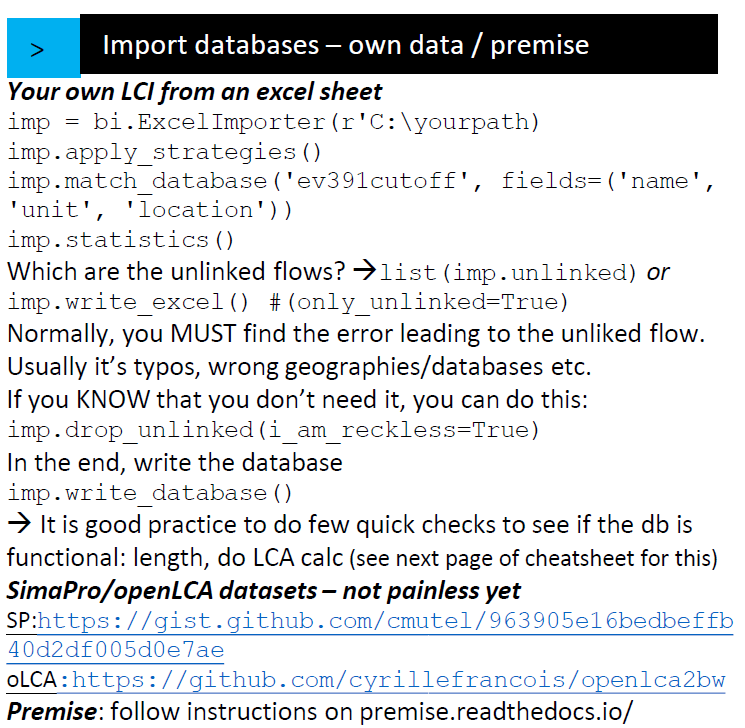


In [ ]:
imp = bi.ExcelImporter(r'C:\Users\treyer_k\Documents\GitHub\winter-school-psi-2025\tutorials\activity_browser\lci_hydrogen_electrolysis_v3_10_1_importable.xlsx') #give the path to your inventory excel file
imp.apply_strategies()
imp.match_database("ecoinvent-3.10-cutoff", fields=('name','unit','location', 'reference product'))
imp.match_database(fields=('name', 'unit', 'location'))
imp.statistics()
#imp.write_excel(only_unlinked=True)
imp.write_excel()
list(imp.unlinked)

imp.write_database()

The statistics tell you that there are some unlinked flows. This means that no corresponding dataset for an exchange listed in the spreadsheet could be found. 
Usually, this is because of types, wrong type, wrong unit, etc.
Open the excel file with the unlinked flows ("Wrote matching file to *path* --> copy that path and paste into your folder window). It will show you the lines where a problem has occurred. 
Did you find the errors?

Correct these errors, save the file and run the cell above again. Only when all exchanges could be linked (the statistics tell you that 0 unlinked exchanges are left) the database will be written = saved.

You can look at this in Activity Browser

In [ ]:
list(bd.databases)

### 5. Looking at the databases

This is more human friendly in AB! For quick overviews, searches etc., AB is more convenient than the jupyter notebook.
The cheatsheet summarises how you can do searches. Try it yourself.

If you want to know more about how this works, the keyword is "list comprehension".

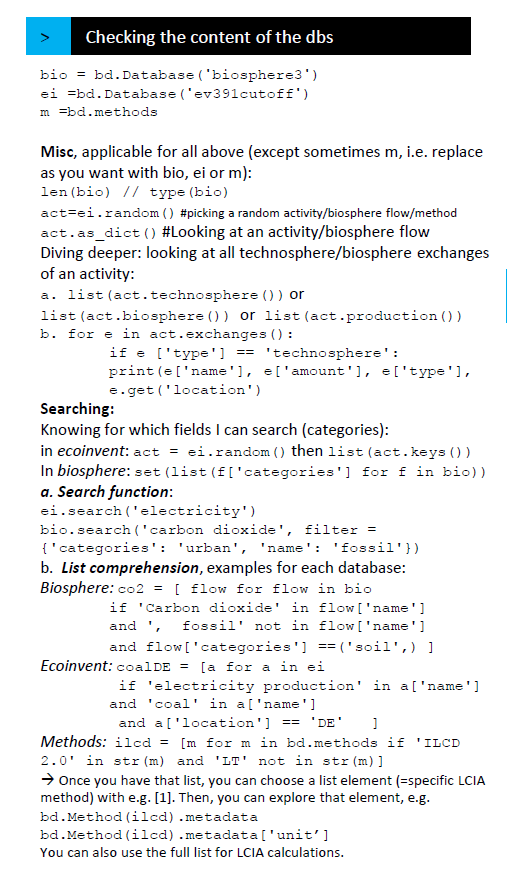

First, we choose the activities we want to analyse later in the LCA. Here, I want to compare hydrogen production with different electrolysers.

In [13]:
h2elec =  bd.Database('h2_electrolysis')

In [ ]:
h2prod = [a for a in h2elec if 'hydrogen production, gaseous' in a ['name']]
h2prod

We can look at one of these activities here. 
But you might prefer to do that in AB.

In [ ]:
list(h2prod[0].technosphere())

We also need to choose LCIA methods. Here, I only chose to compare the different IPCC GWP time horizons to make it simple

In [ ]:
#if you don't know the names of the different LCIA methods, you can check all methods in AB, or get a list of all of them here.
bd.methods

In [ ]:
ipcc = [m for m in bd.methods if 'IPCC' in str(m) and '2021' in str(m) and 'GWP' in str(m) and 'LT' not in str(m) and 'fossil' not in str(m) and 'biogenic' not in str(m) and 'land use' not in str(m) and 'SLCFs' not in str(m)]
ipcc

### 6. Doing an LCA

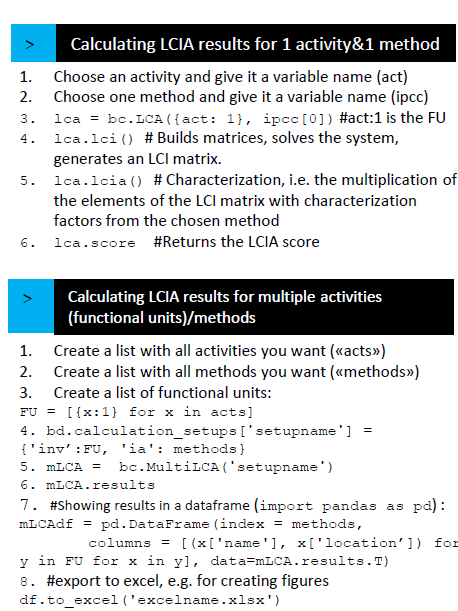

In [18]:
#defining the Functional Units: we want "1" of the activities which produce hydrogen.
FU = [{x:1} for x in h2prod]

In [ ]:
#using a BW function to do the LCA:
bd.calculation_setups['GWPs_electrolysis'] = {'inv':FU, 'ia': ipcc}
mylca = bc.MultiLCA('GWPs_electrolysis')
mylca.results

That's nice, but not very human friendly. Let's look at a snippet of these results.

In [ ]:
{k:v for k,v in zip(ipcc, mylca.results[0])}

Better, but still not so convenient. We are using pandas to show the results in a way which is better defined.

In [ ]:
mylcadf = pd.DataFrame(index = ipcc, columns = [(x['name'], x['location']) for y in FU for x in y], data=mylca.results.T)
mylcadf


In [25]:
#export to excel, e.g. for creating figures
mylcadf.to_excel('lcia_results_hydrogen.xlsx')

### 7. Contribution analysis

This has become much more intuitive in bw2.5. But for us in bw2, we can do the two cells below.

This will calculate the contribution of each exchange to the total score in absolute and relative terms; and the original amount used of that exchange in the activities.

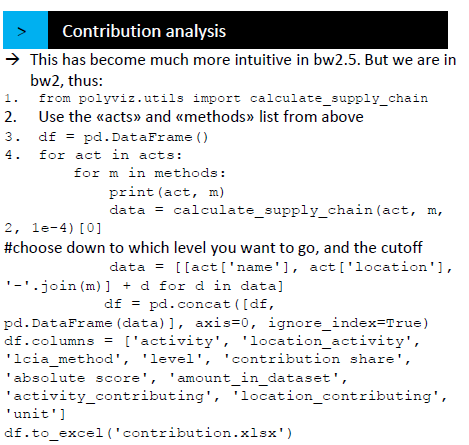

In [ ]:
#We will use the polyviz library from Romain Sacchi to do the contribution ananalysis. You can also do nice visualisations with that library!
#See https://github.com/romainsacchi/polyviz for more information
#I you haven't installed the library yet in your environment, you can do so with the following command:
#pip install polyviz

In [ ]:
#pip install git+https://github.com/romainsacchi/d3blocks.git

In [26]:
from polyviz.utils import calculate_supply_chain

In [ ]:
df = pd.DataFrame()
for act in h2prod:
    for m in ipcc:
        print(act, m) #This is only to see the progress
        #use the function to calculate the contribution analysis
        data = calculate_supply_chain(act, m, 2, 1e-4)[0]  #Here, you can choose how many levels you want to explore, and which cut-off you want to choose)
        
        #add the name of the activity and the name of the method
        data = [[act['name'], act['location'], '-'.join(m)] + d for d in data]
        df = pd.concat([df, pd.DataFrame(data)], axis=0, ignore_index=True)
df.columns = ['activity', 'location_activity', 'lcia_method', 'level', 'contribution share', 'absolute score', 'amount_in_dataset', 'activity_contributing', 'location_contributing', 'unit']
df.to_excel('contribution.xlsx')

### 8. Easy plotting

You can use seaborn or matplotlib for plotting. For very easy plotting, pandas also comes with some functions. 

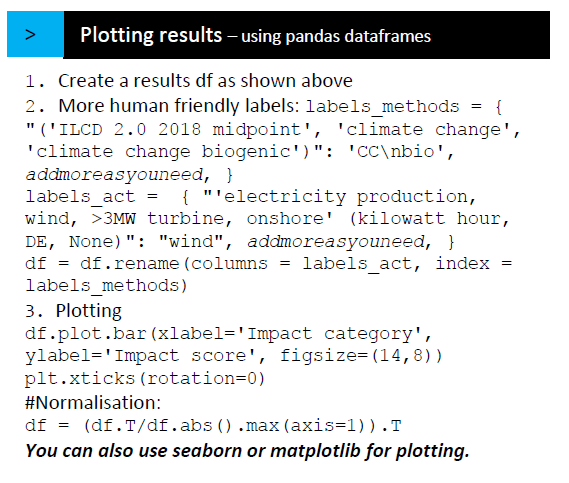

In [ ]:
#we are using the mylcadf dataframe created further above.
mylcadf

In [ ]:
print(mylcadf.columns.tolist())

We relabel the names so that they are shorter

In [ ]:
ipcc

In [35]:
# More human friendly labels:
labels_methods = {
('IPCC 2021', 'climate change', 'global warming potential (GWP100)'): "IPCC GWP100", 
('IPCC 2021', 'climate change', 'global warming potential (GWP20)'): 'IPCC GWP20',
('IPCC 2021', 'climate change', 'global warming potential (GWP500)'): 'IPCC GWP500',  
 }

In [ ]:
h2prod

In [33]:
labels_act =  { ('hydrogen production, gaseous, 1 bar, from SOEC electrolysis, from grid electricity', 'CH'): "SOEC_with_steam",
('hydrogen production, gaseous, 20 bar, from AEC electrolysis, from grid electricity', 'CH'): "AEC", 
('hydrogen production, gaseous, 30 bar, from PEM electrolysis, from grid electricity', 'RER'): "PEM",
('hydrogen production, gaseous, 1 bar, from SOEC electrolysis, with steam input, from grid electricity', 'CH'): "SOEC" }

In [ ]:
df = mylcadf.rename(columns = labels_act, index = labels_methods)
df

Now we plot the dataframe

In [ ]:
# plot data
df.plot.bar(xlabel='Impact category', ylabel='Impact score', figsize=(14,8))

# rotate xticks for horizontal impact category names
plt.xticks(rotation=0)

We can also normalise.

In [ ]:
# normalize
df_norm = (df.T / df.abs().max(axis=1)).T

# activate grid and set font size
plt.rcParams.update({
    'font.size': 16,
    'axes.grid': True,
    'axes.grid.which': 'major',
    'axes.axisbelow': True,
})

# plot data
df_norm.plot.bar(xlabel='Impact category', ylabel='Impact score', figsize=(14,8))

# rotate xticks for horizontal impact category names
plt.xticks(rotation=0)